In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import norm
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import shapiro
from scipy.stats import kstest
from statsmodels.tsa.seasonal import STL
from scipy import special

In [16]:
df=pd.read_csv('DataFix.csv',sep=';', decimal=',', index_col='DATE', parse_dates=True, dayfirst=True)
pd.set_option('display.float_format', '{:,.2f}'.format)
df.sort_index(inplace=True)
print(df.shape)
df.head()

(365, 1)


,VOLUME
DATE,
2022-06-01,"44,003.56"
2022-06-02,"48,991.85"
2022-06-03,"51,690.92"
2022-06-04,"47,790.83"
2022-06-05,"42,896.64"


<Axes: xlabel='DATE'>

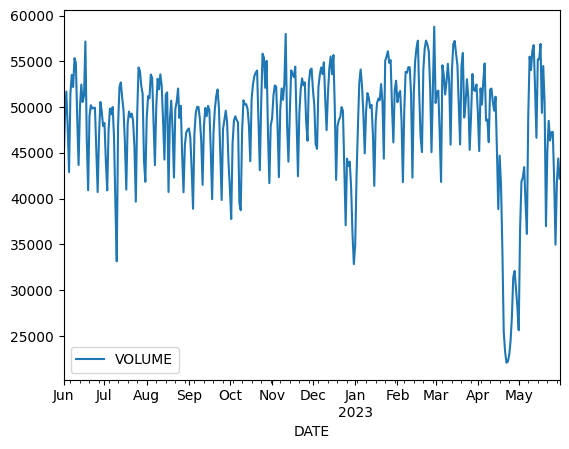

In [17]:
df.plot(y='VOLUME')

<Axes: xlabel='DATE'>

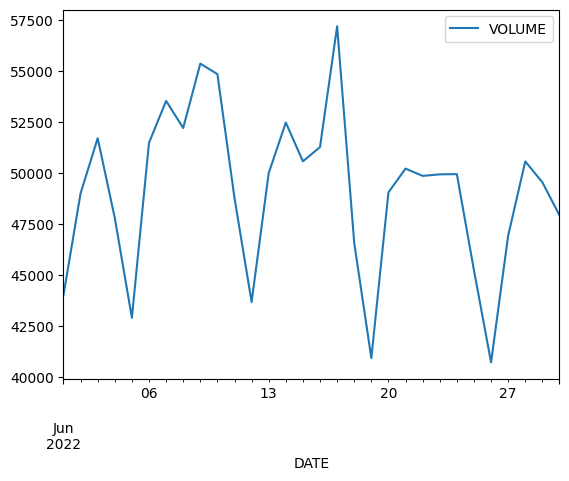

In [18]:
june_2022 = df.loc['2022/06']
june_2022.plot(y='VOLUME')

**Detecting Sesonality and Trend**

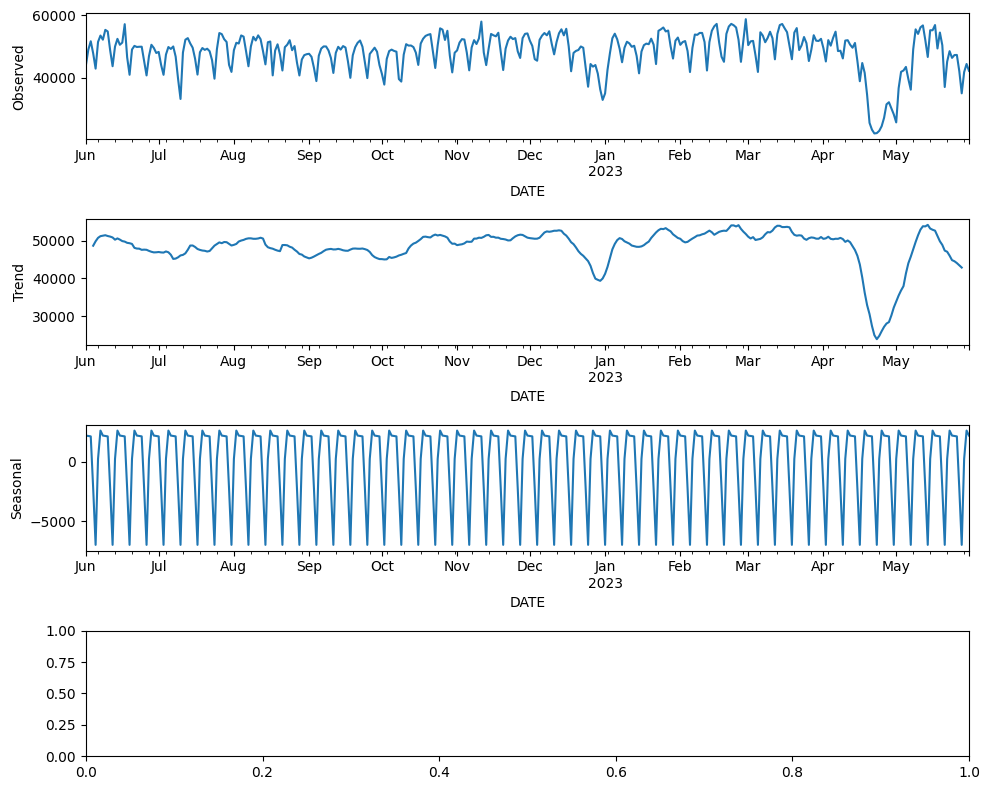

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['VOLUME'], model='additive')  # Use 'multiplicative' for non linear trend

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
result.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')


plt.tight_layout()
plt.show()

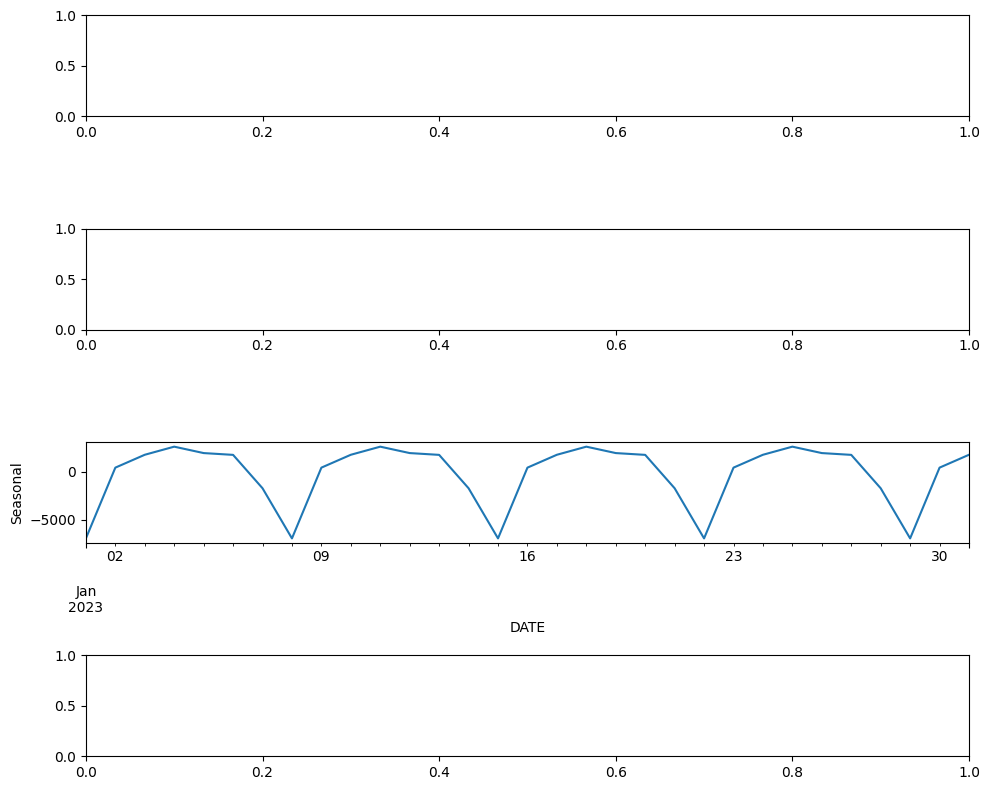

In [23]:
# Filter data for January 2023
january_2023 = df.loc['2023/01']

# Perform seasonal decomposition
result = seasonal_decompose(january_2023, model='additive')  # Use 'multiplicative' for non-linear trend

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')

plt.tight_layout()
plt.show()

### Normality Test

Text(0.5, 1.0, 'Histogram of Data')

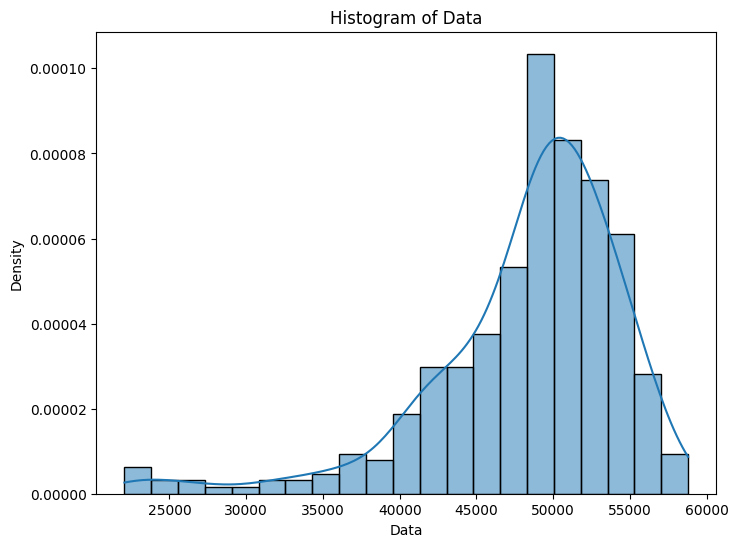

In [24]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['VOLUME'], kde=True, stat='density')
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Histogram of Data')




In [19]:
import numpy as np
from scipy.stats import normaltest

# Perform D'Agostino's K-squared test
k2_statistic, p_value = normaltest(df)

# Set significance level
alpha = 0.05

# Print results
print("D'Agostino's K-squared test statistic:", k2_statistic)
print("p-value:", p_value)

# Perform hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis. The data does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis. The data follows a normal distribution.")


D'Agostino's K-squared test statistic: [125.37065407]
p-value: [5.97184287e-28]
Reject the null hypothesis. The data does not follow a normal distribution.


In [ ]:
# # Assuming your data is stored in a variable called 'data'
# data = df['VOLUME']

# # Create a Q-Q plot
# stats.probplot(data, dist="norm", plot=plt)
# plt.title("Q-Q Plot")
# plt.xlabel("Theoretical Quantiles")
# plt.ylabel("Sample Quantiles")
# plt.show()

In [ ]:
# # Create a histogram
# plt.figure(figsize=(8, 6))
# sns.histplot(df['VOLUME'], kde=True, stat='density')
# plt.xlabel('Data')
# plt.ylabel('Density')
# plt.title('Histogram of Data')

# # Perform the Shapiro-Wilk normality test on the data
# statistic, p_value = shapiro(df['VOLUME'])

# # Set the significance level (alpha)
# alpha = 0.05

# # Print the test statistic and p-value
# print("Test Statistic:", statistic)
# print("p-value:", p_value)

# # Compare the p-value with the significance level
# if p_value > alpha:
#     print("Data follows a normal distribution (fail to reject null hypothesis)")
# else:
#     print("Data does not follow a normal distribution (reject null hypothesis)")

Box-Cox Transformation

In [25]:
# Apply Box-Cox transformation to the time series data
transformed_data, lambda_value = boxcox(df['VOLUME'])

# Create a new DataFrame with the transformed data
transformed_df = pd.DataFrame({'Transformed_Value': transformed_data}, index=df.index)

# Concatenate the original and transformed dataframes
result_df = pd.concat([df, transformed_df], axis=1)
result_df = result_df.rename(columns={'VOLUME':'Actual_Value'})

# Print the combined DataFrame
print("Lambda Value:", lambda_value)
result_df.head()

Lambda Value: 4.217336828667283


,Actual_Value,Transformed_Value
DATE,,
2022-06-01,"44,003.56","9,080,590,171,912,008,704.00"
2022-06-02,"48,991.85","14,282,154,504,148,963,328.00"
2022-06-03,"51,690.92","17,906,774,968,518,803,456.00"
2022-06-04,"47,790.83","12,862,753,426,476,957,696.00"
2022-06-05,"42,896.64","8,155,508,753,746,161,664.00"


Normality After Box-Cox Transformation

Text(0.5, 1.0, 'Histogram of Data After Transformation')

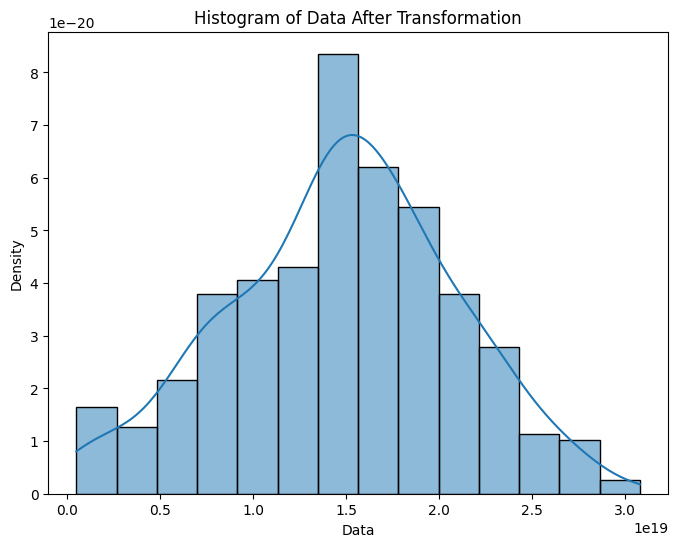

In [26]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(result_df['Transformed_Value'], kde=True, stat='density')
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Histogram of Data After Transformation')


In [ ]:
# # Assuming your data is stored in a variable called 'data'
# data = result_df['Transformed_Value']

# # Create a Q-Q plot
# stats.probplot(data, dist="norm", plot=plt)
# plt.title("Q-Q Plot After Transformation")
# plt.xlabel("Theoretical Quantiles")
# plt.ylabel("Sample Quantiles")
# plt.show()

In [27]:
df_transformed = result_df['Transformed_Value']
df_transformed = pd.DataFrame(df_transformed)
df_transformed.columns = ['VOLUME']
df_transformed.head()

,VOLUME
DATE,
2022-06-01,"9,080,590,171,912,008,704.00"
2022-06-02,"14,282,154,504,148,963,328.00"
2022-06-03,"17,906,774,968,518,803,456.00"
2022-06-04,"12,862,753,426,476,957,696.00"
2022-06-05,"8,155,508,753,746,161,664.00"


In [19]:
# df_transformed.to_csv('Hasil_box-cox', index=True)

In [28]:
import numpy as np
from scipy.stats import normaltest

# Perform D'Agostino's K-squared test
k2_statistic, p_value = normaltest(df_transformed)

# Set significance level
alpha = 0.05

# Print results
print("D'Agostino's K-squared test statistic:", k2_statistic)
print("p-value:", p_value)

# Perform hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis. The data does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis. The data follows a normal distribution.")


D'Agostino's K-squared test statistic: [2.69153724]
p-value: [0.26033953]
Fail to reject the null hypothesis. The data follows a normal distribution.


Reverse Box_Cox

In [ ]:
# original_data = special.inv_boxcox(df_transformed, lambda_value)
# original_data = pd.DataFrame(original_data)

# # Print the original data
# original_data.head()

In [ ]:
# if isinstance(df_transformed, pd.DataFrame):
#     print("The object is a data frame.")
# else:
#     print("The object is not a data frame.")

### ACF & PACF

In [ ]:
# from statsmodels.graphics import tsaplots
# from statsmodels.graphics.tsaplots import plot_pacf
# import matplotlib.pyplot as plt


# #plot autocorrelation function
# fig = tsaplots.plot_acf(df)
# plt.show()

# #plot partial autocorrelation function (FIX THE LAGS)
# fig = tsaplots.plot_pacf(df['VOLUME'], lags=7)
# plt.show()

In [ ]:
# from statsmodels.tsa.stattools import adfuller

# def adf_test(df):
#     dftest = adfuller(df, autolag = 'AIC')
#     print("1. ADF: ", dftest[0])
#     print("2. P-Value : ", dftest[2])
#     print("3. Num Of Lags :", dftest[2])
#     print("4. Num Of Observations Used For ADF Regression:",dftest[3])
#     print("5. Critcal Values : ")
#     for key, val in dftest[4].items():
#         print("\t",key, ": ", val)
# adf_test(df)

In [ ]:
# df['DIFFERENCE'] = df['VOLUME'].diff()
# df = df.dropna()
# print(df)

In [ ]:
# df_dif = pd.DataFrame(df)
# df = df.drop('VOLUME', axis=1)
# df = df.rename(columns={'DIFFERENCE': 'VOLUME'})
# df

## **ARIMA**

In [ ]:
# from pmdarima import auto_arima
# arima1 = auto_arima(df_transformed, seasonal=False, trace=True, 
#                     error_action='ignore',  
#                     suppress_warnings=True, 
#                     stepwise=True)

# arima1.summary()

In [ ]:
# from pmdarima import auto_arima
# arima2 = auto_arima(df_transformed, max_q=2,
#                            seasonal=False, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)

# arima2.summary()

In [ ]:
# from statsmodels.stats.diagnostic import acorr_ljungbox

# arima_resd = arima2.resid()

# # Print the residuals
# print("Residuals:")
# print(arima_resd.head())

# alpha = 0.05

# ljungbox_arima = acorr_ljungbox(arima_resd, lags=[5, 10, 15, 20, 25, 30], return_df=True)
# ljungbox_arima


In [ ]:
# predic = arima2.predict(n_periods=100)
# predic

In [ ]:
# forecast_data = special.inv_boxcox(predic, lambda_value)
# forecast_data = pd.DataFrame(original_data)

# # Print the original data
# forecast_data.head()

In [ ]:
# plt.plot(forecast_data, label='Real Value')
# plt.show()

In [ ]:
# # Split the data into train and test sets
# train_size = int(len(df) * 0.8)  # Use 80% of the data for training
# train = df_transformed.iloc[:train_size]
# test = df.iloc[train_size:]
# print(df.shape)
# print(train.shape,test.shape)

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# model=SARIMAX(train,order=sarima4.order, exog=None)
# model=model.fit()
# model.summary()


In [ ]:
# train_normal = df.iloc[:train_size]

# start=len(train_normal)
# end=len(train_normal)+len(test)-1
# pred=model.predict(start=start,end=end,typ='levels')
# pred = special.inv_boxcox(pred, lambda_value)
# pred = pd.DataFrame(pred)

# # Plotting the train and test data
# plt.plot(train_normal.index, train_normal, label='Train')
# plt.plot(test.index, test, label='Test')
# plt.plot(pred.index, pred, label='Forecast')
# plt.legend()
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Training, Testing, and Forecasting Data SARIMA')
# plt.show()

In [ ]:
# print(df_transformed.shape)
# train=df_transformed.iloc[:-30]
# test=df.iloc[-30:]
# print(train.shape,test.shape)

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA
# model=ARIMA(train,order=(1,0,2))
# model=model.fit()
# model.summary()


In [ ]:
# start=len(train)
# end=len(train)+len(test)-1
# pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
# pred.plot(legend=True)
# test['VOLUME'].plot(legend=True)

Uji Ljung-Box ARIMA

In [ ]:
# from scipy.stats import chi2

# arima_resd = arima.resid()


# # Print the residuals
# print("Residuals:")
# print(arima_resd.head())

# from statsmodels.stats.diagnostic import acorr_ljungbox

# alpha = 0.05

# p_arima = arima.order[0]
# d_arima = arima.order[1]
# q_arima = arima.order[2]
# pq = p_arima+q_arima
# pq

# critical_value = chi2.ppf(1 - alpha, df)

# ljungbox_arima = acorr_ljungbox(arima_resd, lags=[12, 24], return_df=True)
# ljungbox_arima.insert(0, 'Df (K-k)', [9, 21])
# critical_value = chi2.ppf(1 - alpha, ljungbox_arima['Df (K-k)'])
# ljungbox_arima.insert(2, 'X^2 table', critical_value)
# ljungbox_arima.index.name = 'Lag'
# ljungbox_arima


In [ ]:
# mape = np.mean(np.abs((actual_values - forecasted_values) / actual_values)) * 100
# print("MAPE:", mape)

# # Calculate MAD (Mean Absolute Deviation)
# mad = np.mean(np.abs(actual_values - forecasted_values))
# print("MAD:", mad)

# # Calculate MSE (Mean Squared Error)
# mse = np.mean((actual_values - forecasted_values) ** 2)
# print("MSE:", mse)

## **SARIMA**

In [38]:
from pmdarima import auto_arima
sarima1 = auto_arima(df_transformed, m=7, seasonal=True, trace=True, 
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)

sarima1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=32209.976, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=32613.244, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=32309.217, Time=0.71 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=33004.186, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=33315.766, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=32318.171, Time=0.36 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(2,0,2)(2,0,1)[7] intercept   : AIC=32210.742, Time=1.43 sec
 ARIMA(2,0,2)(1,0,2)[7] intercept   : AIC=32210.849, Time=1.65 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=32383.543, Time=0.12 sec
 ARIMA(2,0,2)(0,0,2)[7] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(2,0,2)(2,0,0)[7] intercept   : AIC=32240.242, Time=2.09 sec
 ARIMA(2,0,2)(2,0,2)[7] intercept   : AIC=32213.955, Time=2.88 sec
 ARIMA(1,0,2)(1,0,1)[7] intercept   : AIC=32205.823, Time=2.66 sec
 ARIMA(1,0,2)(0,0,1)[7] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  365
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 7)   Log Likelihood              -16095.911
Date:                             Wed, 16 Aug 2023   AIC                          32203.823
Time:                                     17:24:01   BIC                          32227.222
Sample:                                 06-01-2022   HQIC                         32213.122
                                      - 05-31-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9192      0.053     17.298      0.000       0.815       1.023
ma.L1         -0.2083      0.104     -2.010      0.044      -0.411      -0.005
ma.L2         -0.1365      0.129     -1.058      0.290      -0.389       0.116
ar.S.L7        0.9944      0.009    114.972      0.000       0.977       1.011
ma.S.L7       -0.8980      0.074    -12.154      0.000      -1.043      -0.753
sigma2      1.952e+37    1.2e-39   1.63e+76      0.000    1.95e+37    1.95e+37
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                75.33
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.55e+91. Standard errors may be unstable.
"""

In [39]:
from pmdarima import auto_arima
sarima2 = auto_arima(df_transformed, m=7, start_q = 1, max_q =1,
                    seasonal=True, trace=True, 
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)

sarima2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(1,0,1)[7] intercept   : AIC=32222.781, Time=1.56 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=32613.244, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=32309.217, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=33004.186, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=33315.766, Time=0.02 sec
 ARIMA(2,0,1)(0,0,1)[7] intercept   : AIC=32369.948, Time=0.50 sec
 ARIMA(2,0,1)(1,0,0)[7] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,0,1)(2,0,1)[7] intercept   : AIC=32223.974, Time=1.91 sec
 ARIMA(2,0,1)(1,0,2)[7] intercept   : AIC=32224.034, Time=1.52 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=32460.429, Time=0.31 sec
 ARIMA(2,0,1)(0,0,2)[7] intercept   : AIC=32325.492, Time=0.96 sec
 ARIMA(2,0,1)(2,0,0)[7] intercept   : AIC=32253.004, Time=1.53 sec
 ARIMA(2,0,1)(2,0,2)[7] intercept   : AIC=32226.758, Time=2.16 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=32255.531, Time=1.68 sec
 ARIMA(2,0,0)(1,0,1)[7] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  365
Model:             SARIMAX(3, 0, 0)x(1, 0, [1], 7)   Log Likelihood              -16103.347
Date:                             Wed, 16 Aug 2023   AIC                          32218.695
Time:                                     17:32:26   BIC                          32242.094
Sample:                                 06-01-2022   HQIC                         32227.994
                                      - 05-31-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7075      0.089      7.930      0.000       0.533       0.882
ar.L2         -0.0048      0.144     -0.033      0.974      -0.287       0.277
ar.L3          0.1666      0.121      1.380      0.168      -0.070       0.403
ar.S.L7        0.9928      0.010     95.508      0.000       0.972       1.013
ma.S.L7       -0.8843      0.077    -11.433      0.000      -1.036      -0.733
sigma2      2.105e+37   2.49e-39   8.44e+75      0.000    2.11e+37    2.11e+37
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                66.88
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.3e+91. Standard errors may be unstable.
"""

In [40]:
from pmdarima import auto_arima
sarima3 = auto_arima(df_transformed, m=7, start_q= 0, start_p=0,
                    max_q = 1, max_p= 1, seasonal=True, trace=True, 
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)

sarima3.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=32508.830, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=32613.244, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=32309.217, Time=0.19 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=33004.186, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=33315.766, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=32467.899, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=32281.382, Time=0.48 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=32257.724, Time=0.77 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=32256.430, Time=0.34 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=32378.034, Time=0.17 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=32257.803, Time=0.61 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=32339.399, Time=0.39 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=32260.422, Time=0.71 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=32255.531, Time=0.37 sec
 ARIMA(1,0,1)(0,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  365
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood              -16121.766
Date:                           Wed, 16 Aug 2023   AIC                          32253.531
Time:                                   17:32:53   BIC                          32273.030
Sample:                               06-01-2022   HQIC                         32261.280
                                    - 05-31-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8885      0.068     13.099      0.000       0.756       1.021
ma.L1         -0.2165      0.132     -1.644      0.100      -0.475       0.042
ar.S.L7        0.9918      0.012     83.938      0.000       0.969       1.015
ma.S.L7       -0.8755      0.086    -10.200      0.000      -1.044      -0.707
sigma2      2.457e+37   1.11e-39   2.21e+76      0.000    2.46e+37    2.46e+37
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                65.11
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.24e+92. Standard errors may be unstable.
"""

In [41]:
from pmdarima import auto_arima
sarima4 = auto_arima(df_transformed, m=7, start_q= 0, start_p=0,
                    max_q = 0, max_p= 1, seasonal=True, trace=True, 
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)

sarima4.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=32508.830, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=32613.244, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=32309.217, Time=0.25 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=32508.254, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=33315.766, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=32467.899, Time=0.18 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=32281.382, Time=0.60 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=32257.724, Time=0.80 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=32256.430, Time=0.32 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=32378.034, Time=0.15 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=32257.803, Time=0.66 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=32339.399, Time=0.35 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=32260.422, Time=0.68 sec
 ARIMA(1,0,0)(1,0,1)[7]             : AIC=32254.430, Time=0.31 sec
 ARIMA(1,0,0)(0,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  365
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood              -16123.215
Date:                             Wed, 16 Aug 2023   AIC                          32254.430
Time:                                     17:33:08   BIC                          32270.030
Sample:                                 06-01-2022   HQIC                         32260.630
                                      - 05-31-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8228      0.062     13.241      0.000       0.701       0.945
ar.S.L7        0.9910      0.012     85.307      0.000       0.968       1.014
ma.S.L7       -0.8649      0.083    -10.478      0.000      -1.027      -0.703
sigma2      2.456e+37    4.9e-40   5.01e+76      0.000    2.46e+37    2.46e+37
===================================================================================
Ljung-Box (L1) (Q):                   3.17   Jarque-Bera (JB):               102.42
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.93e+91. Standard errors may be unstable.
"""

In [44]:
from statsmodels.stats.diagnostic import acorr_ljungbox

sarima_resd = sarima4.resid()

# Print the residuals
print("Residuals:")
print(sarima_resd.head())

alpha = 0.05

ljungbox_arima = acorr_ljungbox(sarima_resd, lags=[5, 10, 15, 20, 25, 30], return_df=True)
ljungbox_arima


Residuals:
DATE
2022-06-01    9,080,590,171,912,008,704.00
2022-06-02    6,335,811,001,030,389,760.00
2022-06-03    5,668,512,534,912,966,656.00
2022-06-04   -2,341,581,839,508,580,352.00
2022-06-05   -3,076,316,103,661,393,920.00
dtype: float64


,lb_stat,lb_pvalue
5,8.38,0.14
10,17.75,0.06
15,19.00,0.21
20,21.14,0.39
25,28.54,0.28
30,30.04,0.46


Forecast Accuracy Train vs Test

In [45]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # Use 80% of the data for training
train = df_transformed.iloc[:train_size]
test = df.iloc[train_size:]
print(df.shape)
print(train.shape,test.shape)

(365, 1)
(292, 1) (73, 1)


In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train,order=sarima4.order,
              seasonal_order=sarima4.seasonal_order, exog=None)
model=model.fit()
model.summary()

c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              VOLUME   No. Observations:                  292
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood              -12890.647
Date:                             Wed, 16 Aug 2023   AIC                          25789.293
Time:                                     17:33:20   BIC                          25804.000
Sample:                                 06-01-2022   HQIC                         25795.184
                                      - 03-19-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7647      0.092      8.296      0.000       0.584       0.945
ar.S.L7        0.9888      0.021     46.775      0.000       0.947       1.030
ma.S.L7       -0.8060      0.159     -5.061      0.000      -1.118      -0.494
sigma2      2.462e+37   2.69e-39   9.16e+75      0.000    2.46e+37    2.46e+37
===================================================================================
Ljung-Box (L1) (Q):                   1.98   Jarque-Bera (JB):               142.63
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.34
Prob(H) (two-sided):                  0.15   Kurtosis:                         6.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+91. Standard errors may be unstable.
"""

c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


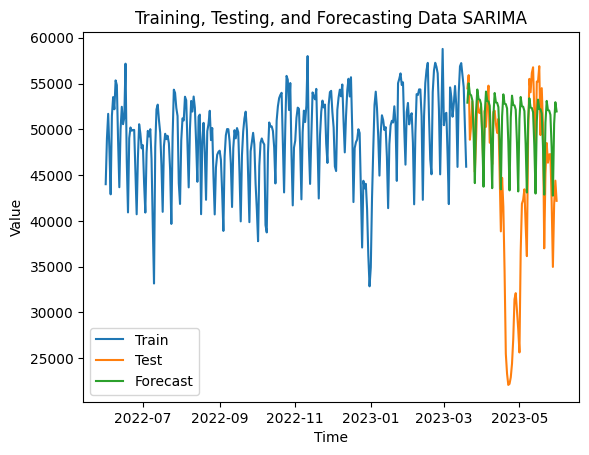

In [47]:
train_normal = df.iloc[:train_size]

start=len(train_normal)
end=len(train_normal)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred = special.inv_boxcox(pred, lambda_value)
pred = pd.DataFrame(pred)

# Plotting the train and test data
plt.plot(train_normal.index, train_normal, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Training, Testing, and Forecasting Data SARIMA')
plt.show()

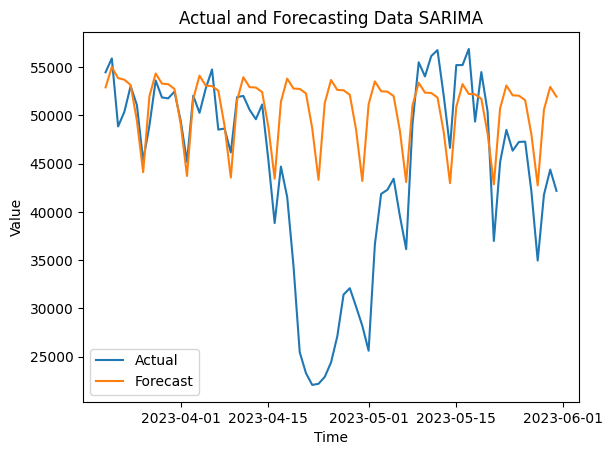

In [48]:
train_normal = df.iloc[:train_size]

start=len(train_normal)
end=len(train_normal)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred = special.inv_boxcox(pred, lambda_value)
pred = pd.DataFrame(pred)

# Plotting the train and test data
plt.plot(test.index, test, label='Actual')
plt.plot(pred.index, pred, label='Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual and Forecasting Data SARIMA')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred.rename(columns={'predicted_mean' : 'VOLUME'}, inplace = True)

# Calculate Mean Absolute Deviation (MAD)
mad = mean_absolute_error(test['VOLUME'], pred['VOLUME'])
print("Mean Absolute Deviation (MAD):", mad)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test['VOLUME'] - pred['VOLUME']) / test['VOLUME'])) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['VOLUME'], pred['VOLUME'])
print("Mean Squared Error (MSE):", mse)

Mean Absolute Deviation (MAD): 7562.334376945288
Mean Absolute Percentage Error (MAPE): 23.81305047064802
Mean Squared Error (MSE): 125398911.05102764


In [ ]:
# # Split the data into train and test sets
# train_size = int(len(df) * 0.8)  # Use 80% of the data for training
# train = df_transformed.iloc[:train_size]
# test = df.iloc[train_size:]
# print(df.shape)
# print(train.shape, test.shape)

# from statsmodels.tsa.statespace.sarimax import SARIMAX

# model = SARIMAX(train, order=sarima4.order, seasonal_order=sarima4.seasonal_order, exog=None)
# model = model.fit()
# model_summary = model.summary()

# # Extract the forecasted values for n periods (n = length of test data)
# n = len(test)
# forecast_values = model.forecast(steps=n)

# # Print the forecasted values for the test data
# print(forecast_values)


In [ ]:
# sarima_predic_inv = special.inv_boxcox(forecast_values, lambda_value)
# sarima_predic_inv = pd.DataFrame(sarima_predic_inv)

# # Assuming your DataFrame is named df
# # Create a new list of column names with the desired new name for column '0'
# new_column_names = ['VOLUME'] + list(sarima_predic_inv.columns[1:])

# # Assign the new column names to the DataFrame
# sarima_predic_inv.columns = new_column_names

# # Print the original data
# sarima_predic_inv.head()

In [61]:
# sarima_predic_inv.to_csv('Hasil_forecast_sarima_test.csv', index=True)

Forecast June 2023

In [50]:
sarima_predic_actual = sarima4.predict(n_periods=30)
sarima_predic_actual = pd.DataFrame(sarima_predic_actual)
sarima_predic_actual

,0
2023-06-01,"8,118,421,991,272,525,824.00"
2023-06-02,"9,921,703,948,885,340,160.00"
2023-06-03,"6,627,798,722,772,336,640.00"
2023-06-04,"2,689,911,246,374,788,608.00"
2023-06-05,"9,461,460,518,612,535,296.00"
2023-06-06,"12,467,363,138,840,254,464.00"
2023-06-07,"11,907,537,331,037,548,544.00"
2023-06-08,"11,646,039,991,574,675,456.00"
2023-06-09,"12,794,809,915,380,830,208.00"
2023-06-10,"9,005,502,925,233,692,672.00"


In [51]:
sarima_predic_actual_inv = special.inv_boxcox(sarima_predic_actual, lambda_value)
sarima_predic_actual_inv = pd.DataFrame(sarima_predic_actual_inv)

# Assuming your DataFrame is named df
# Create a new list of column names with the desired new name for column '0'
new_column_names = ['Forecast Inv'] + list(sarima_predic_actual_inv.columns[1:])

# Assign the new column names to the DataFrame
sarima_predic_actual_inv.columns = new_column_names

# Print the original data
sarima_predic_actual_inv.head()

,Forecast Inv
2023-06-01,"42,850.31"
2023-06-02,"44,937.64"
2023-06-03,"40,837.90"
2023-06-04,"32,976.24"
2023-06-05,"44,434.37"


In [52]:
# sarima_predic_actual.to_csv('Hasil_forecast_actual.csv', index=True)
# sarima_predic_actual_inv.to_csv('Hasil_forecast_actual_inv.csv', index=True)

In [ ]:
# sarima_predic_inv = special.inv_boxcox(sarima_predic, lambda_value)
# sarima_predic_inv = pd.DataFrame(sarima_predic_inv)

# # Assuming your DataFrame is named df
# # Create a new list of column names with the desired new name for column '0'
# new_column_names = ['VOLUME'] + list(sarima_predic_inv.columns[1:])

# # Assign the new column names to the DataFrame
# sarima_predic_inv.columns = new_column_names

# # Print the original data
# sarima_predic_inv.head()

In [ ]:
# sarima_predic_actual_inv.to_csv('Hasil_forecast_sarima_sdsad.csv', index=True)

In [41]:
# sarima_predic_actual_inv = pd.read_csv("Hasil_forecast_sarima_sdsad.csv", sep=',', decimal='.', index_col='DATE', parse_dates=True, dayfirst=True)

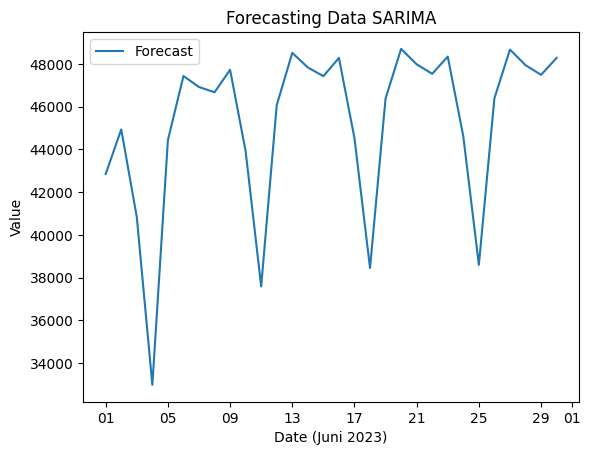

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting the train and test data
plt.plot(sarima_predic_actual_inv.index, sarima_predic_actual_inv, label='Forecast')
plt.legend()

# Format x-axis to show only the day (dd)
date_fmt = mdates.DateFormatter('%d')
plt.gca().xaxis.set_major_formatter(date_fmt)

plt.xlabel('Date (Juni 2023)')
plt.ylabel('Value')
plt.title('Forecasting Data SARIMA')
plt.show()


<Axes: title={'center': 'Average temperatures: Oslo , Norway'}>

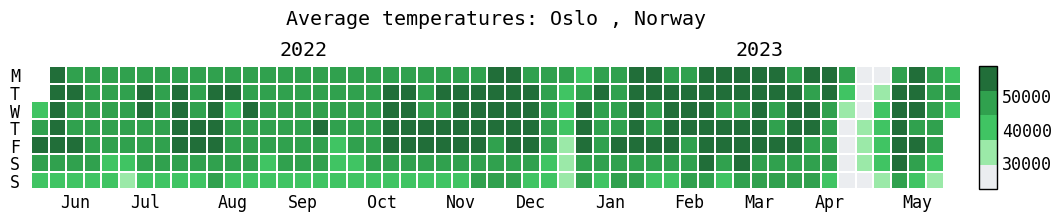

In [55]:
import july
from july.utils import date_range

july.heatmap(df.index, df['VOLUME'], cmap="github", colorbar=True, title="Average temperatures: Oslo , Norway")

Forecast Lain

In [56]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # Use 80% of the data for training
train = df.iloc[:train_size]
test = df.iloc[train_size:]
print(df.shape)
print(train.shape,test.shape)

(365, 1)
(292, 1) (73, 1)


c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


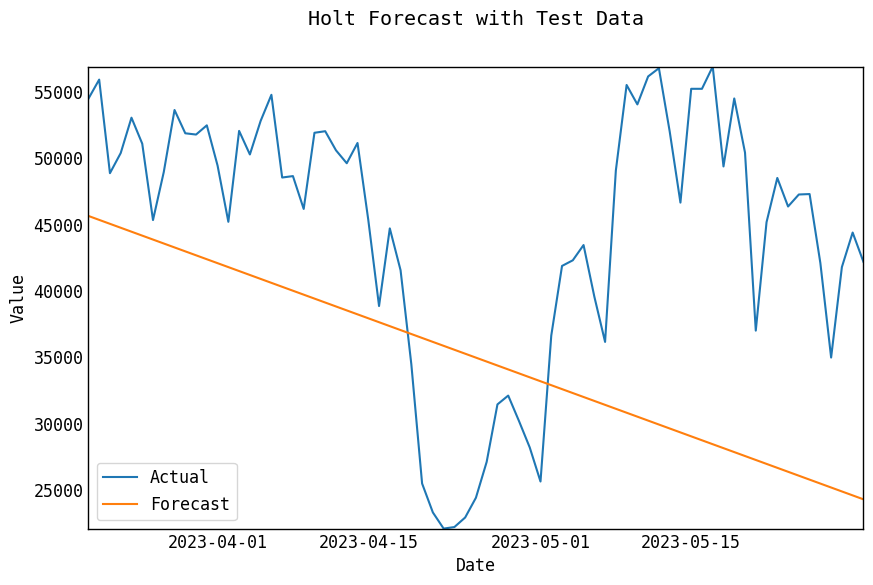

In [57]:
from statsmodels.tsa.holtwinters import Holt

# Fitting Holt's Exponential Smoothing on the training data
model = Holt(train['VOLUME'])
fitted_model = model.fit()

# Perform Holt's linear trend method on the training data
model = Holt(train['VOLUME'])
fit_model = model.fit(optimized=True)

# Forecast using the fitted model for the test d ata period
forecast_values = fit_model.forecast(len(test))

# Plot the test data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['VOLUME'], label='Actual')
plt.plot(test.index, forecast_values, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Holt Forecast with Test Data')
plt.legend()
plt.show()


In [58]:
forecast_values = fit_model.forecast(len(test))
forecast_values = pd.DataFrame(forecast_values)
forecast_values 

,0
2023-03-20,"45,638.89"
2023-03-21,"45,342.24"
2023-03-22,"45,045.58"
2023-03-23,"44,748.92"
2023-03-24,"44,452.26"
...,...
2023-05-27,"25,466.09"
2023-05-28,"25,169.43"
2023-05-29,"24,872.77"
2023-05-30,"24,576.11"


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate Mean Absolute Deviation (MAD)
mad = mean_absolute_error(test['VOLUME'], forecast_values)
print("Mean Absolute Deviation (MAD):", mad)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test['VOLUME'] - forecast_values) / forecast_values)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['VOLUME'], forecast_values)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Deviation (MAD): 12433.032871983789
Mean Absolute Percentage Error (MAPE): nan
Mean Squared Error (MSE): 206724136.73213676


C:\Users\rizki\AppData\Local\Temp\ipykernel_11040\403868799.py:9: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['VOLUME'] - forecast_values) / forecast_values)) * 100


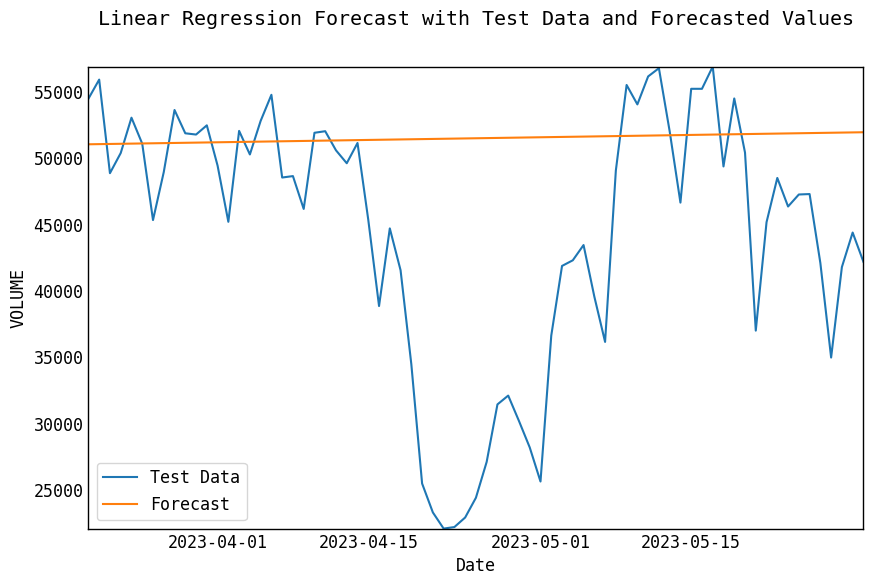

In [60]:
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame called 'df' with a date index and a 'VOLUME' column

# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the training data
X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data['VOLUME'].values

# Prepare the test data
X_test = np.arange(len(train_data), len(df)).reshape(-1, 1)
y_test = test_data['VOLUME'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast using the fitted model for the test data period
forecast_values = model.predict(X_test)

# Plot the test data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['VOLUME'], label='Test Data')
plt.plot(test_data.index, forecast_values, label='Forecast')
plt.xlabel('Date')
plt.ylabel('VOLUME')
plt.title('Linear Regression Forecast with Test Data and Forecasted Values')
plt.legend()
plt.show()


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have a DataFrame called 'df' with a date index and a 'VOLUME' column

# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the training data
X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data['VOLUME'].values

# Prepare the test data
X_test = np.arange(len(train_data), len(df)).reshape(-1, 1)
y_test = test_data['VOLUME'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast using the fitted model for the test data period
forecast_values = model.predict(X_test)

# Calculate evaluation metrics
mad = mean_absolute_error(y_test, forecast_values)
mape = np.mean(np.abs((y_test - forecast_values) / y_test)) * 100
mse = mean_squared_error(y_test, forecast_values)

# Print the evaluation metrics
print("Mean Absolute Deviation (MAD):", mad)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Deviation (MAD): 8442.10430650904
Mean Absolute Percentage Error (MAPE): 26.363385528823276
Mean Squared Error (MSE): 145397085.23379102


Mean Absolute Error (MAE): 7717.0381483792735
Mean Squared Error (MSE): 119341279.46910518
Root Mean Squared Error (RMSE): 10924.343434234626


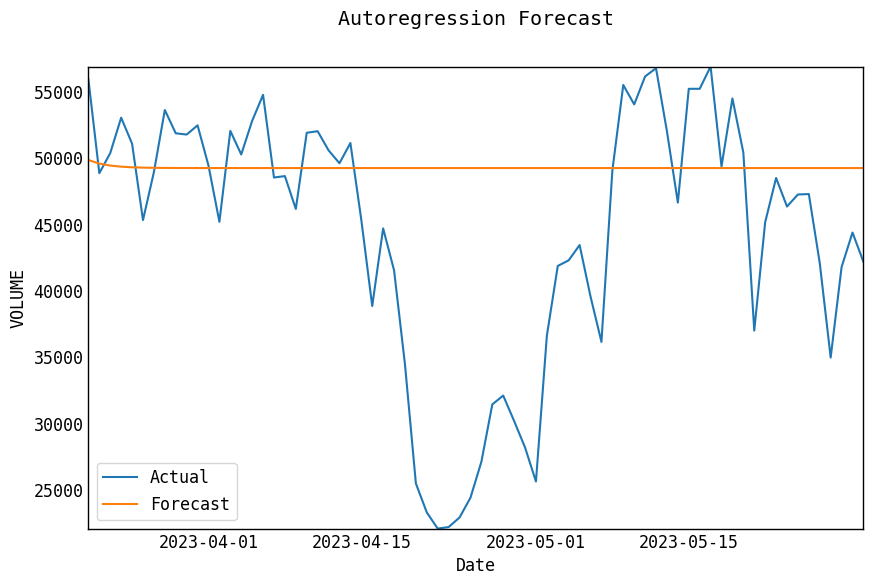

In [62]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have a DataFrame called 'df' with a date index and a 'VOLUME' column

# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the training data
X_train = train_data['VOLUME'].values[:-1]  # Exclude the last value
y_train = train_data['VOLUME'].values[1:]  # Shifted by one time step

# Prepare the test data
X_test = test_data['VOLUME'].values[:-1]  # Exclude the last value
y_test = test_data['VOLUME'].values[1:]  # Shifted by one time step

# Create and fit the autoregression model
model = AutoReg(X_train, lags=1)
model_fit = model.fit()

# Forecast using the fitted model for the test data period
forecast_values = model_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, forecast_values)
mse = mean_squared_error(y_test, forecast_values)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the actual values and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size+1:], y_test, label='Actual')
plt.plot(df.index[train_size+1:], forecast_values, label='Forecast')
plt.xlabel('Date')
plt.ylabel('VOLUME')
plt.title('Autoregression Forecast')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have a DataFrame called 'df' with a date index and a 'VOLUME' column
# Assuming you have already performed the forecast and stored the predicted values in 'forecast_values'

# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the test data
y_test = test_data['VOLUME'].values[:len(forecast_values)]  # Ensure the same length as forecast_values

# Calculate evaluation metrics
mad = mean_absolute_error(y_test, forecast_values)
mape = np.mean(np.abs((y_test - forecast_values) / y_test)) * 100
mse = mean_squared_error(y_test, forecast_values)

# Print the evaluation metrics
print("Mean Absolute Deviation (MAD):", mad)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Deviation (MAD): 7686.730263617752
Mean Absolute Percentage Error (MAPE): 23.821389732248694
Mean Squared Error (MSE): 118995841.92903787


Mean Absolute Deviation (MAD): 8756.120119315066
Mean Squared Error (MSE): 146716402.60793906
Mean Absolute Percentage Error (MAPE): 26.832296568572893


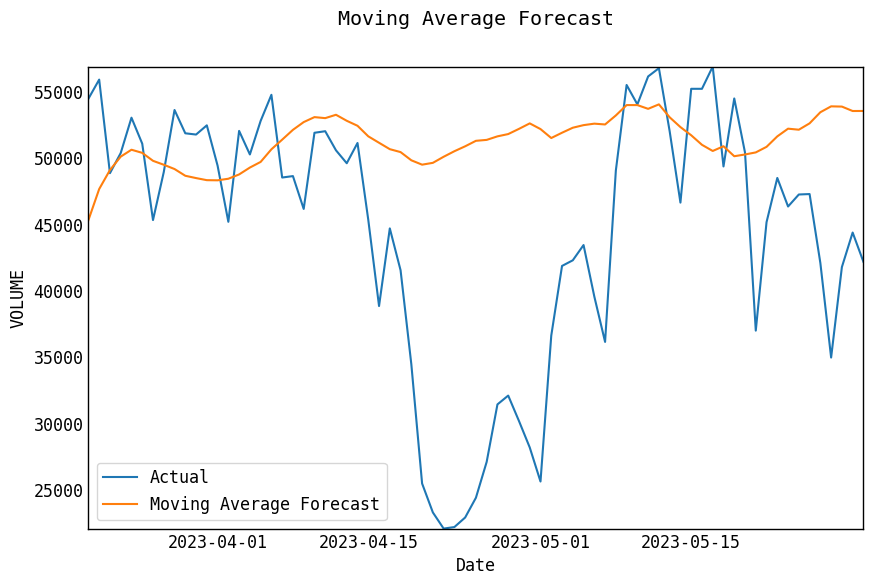

In [64]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have a DataFrame called 'df' with a date index and a 'VOLUME' column

# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the train and test data
train_values = train_data['VOLUME'].values
test_values = test_data['VOLUME'].values

# Calculate the moving average forecast
window = 7  # Define the moving average window
moving_average_forecast = np.convolve(train_values, np.ones(window)/window, mode='valid')

# Calculate the lengths of train and test data for evaluation metrics
train_length = len(train_values)
test_length = len(test_values)

# Slice the moving average forecast to match the test data length
forecast_values = moving_average_forecast[-test_length:]

# Calculate the evaluation metrics
mad = mean_absolute_error(test_values, forecast_values)
mse = mean_squared_error(test_values, forecast_values)
mape = np.mean(np.abs((test_values - forecast_values) / test_values)) * 100

# Print the evaluation metrics
print("Mean Absolute Deviation (MAD):", mad)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_values, label='Actual')
plt.plot(df.index[train_size:], forecast_values, label='Moving Average Forecast')
plt.xlabel('Date')
plt.ylabel('VOLUME')
plt.title('Moving Average Forecast')
plt.legend()
plt.show()

In [65]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have a DataFrame called 'df' with a date index and a 'VOLUME' column

# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the train and test data
train_values = train_data['VOLUME'].values
test_values = test_data['VOLUME'].values

# Fit the Holt-Winters' Exponential Smoothing model
model = ExponentialSmoothing(train_values, trend="add", seasonal="add", seasonal_periods=7)
model_fit = model.fit()

# Perform the forecast
forecast_values = model_fit.forecast(len(test_values))

# Calculate the evaluation metrics
mad = mean_absolute_error(test_values, forecast_values)
mse = mean_squared_error(test_values, forecast_values)
mape = np.mean(np.abs((test_values - forecast_values) / test_values)) * 100

# Print the evaluation metrics
print("Mean Absolute Deviation (MAD):", mad)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Deviation (MAD): 13660.656694633253
Mean Squared Error (MSE): 290967818.9601658
Mean Absolute Percentage Error (MAPE): 39.40413921713598


c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


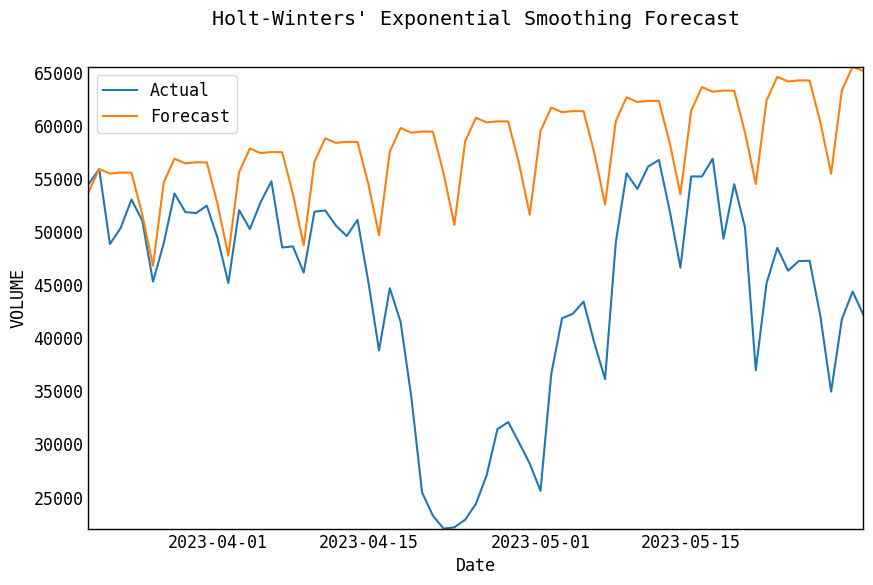

In [66]:
import matplotlib.pyplot as plt

# Plot the actual values and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size:], test_values, label='Actual')
plt.plot(df.index[train_size:], forecast_values, label='Forecast')
plt.xlabel('Date')
plt.ylabel('VOLUME')
plt.title('Holt-Winters\' Exponential Smoothing Forecast')
plt.legend()
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Assuming you have a DataFrame called 'df' with a date index and a 'VOLUME' column

# # Split the data into train and test sets
# train_size = int(len(df) * 0.8)  # 80% for training
# train_data = df.iloc[:train_size]
# test_data = df.iloc[train_size:]

# # Prepare the train and test data
# train_values = train_data['VOLUME'].values
# test_values = test_data['VOLUME'].values

# # Normalize the data
# scaler = MinMaxScaler()
# train_scaled = scaler.fit_transform(train_values.reshape(-1, 1))
# test_scaled = scaler.transform(test_values.reshape(-1, 1))

# # Prepare the data for LSTM
# window_size = 7
# X_train, y_train = [], []
# for i in range(window_size, len(train_scaled)):
#     X_train.append(train_scaled[i - window_size:i, 0])
#     y_train.append(train_scaled[i, 0])
# X_train, y_train = np.array(X_train), np.array(y_train)

# # Reshape input to be 3-dimensional (samples, time steps, features)
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))
# model.add(Dense(units=1))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Fit the model to the training data
# model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# # Prepare the data for forecasting
# inputs = df['VOLUME'].values[-window_size:]
# inputs_scaled = scaler.transform(inputs.reshape(-1, 1))
# X_test = []
# X_test.append(inputs_scaled)
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# # Perform the forecast
# forecast_scaled = model.predict(X_test)
# forecast_values = scaler.inverse_transform(forecast_scaled)

# # Calculate the evaluation metrics
# mad = mean_absolute_error(test_values, forecast_values)
# mse = mean_squared_error(test_values, forecast_values)
# mape = np.mean(np.abs((test_values - forecast_values) / test_values)) * 100

# # Print the evaluation metrics
# print("Mean Absolute Deviation (MAD):", mad)
# print("Mean Squared Error (MSE):", mse)
# print("Mean Absolute Percentage Error (MAPE):", mape)
